<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [2]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [1]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [12]:
import pandas as pd

# 1. Read the CSV file into a pandas data frame
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# 2. Print the first 5 rows of the dataframe
print(df.head())

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [14]:
# 1. Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

# 2. Replace missing values with mean value of the column
for col in columns_with_missing_values:
    df[col].fillna(df[col].mean(), inplace=True)

# 3. Delete duplicate entries
df.drop_duplicates(inplace=True)

print(df)

Columns with missing values: []
         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0       Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1        Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2        Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3       Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4       Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17961    B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4   
17962    B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0   
17963    Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6   
17964       KA  2018       Manual     5007   Petrol  145.0  57.7         1.2   
17965    Focus  2015       Manual     5007   Petrol   22.0  57.7         1.0   

       

In [15]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the correlation values with the target attribute
correlation_with_target = correlation_matrix['price'].abs().sort_values(ascending=False)

# Get the top 5 attributes with highest correlation with the target attribute
top_5_attributes = correlation_with_target[1:6].index.tolist()

print("Top 5 attributes with highest correlation with the target attribute:")
print(top_5_attributes)

<class 'ValueError'>: could not convert string to float: ' Fiesta'

In [8]:
# Count the number of entries with each unique value of attribute 'B'
value_counts = df['fuelType'].value_counts()

print("Number of entries with each unique value of attribute 'fuelType':")
print(value_counts)

Number of entries with each unique value of attribute 'fuelType':
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


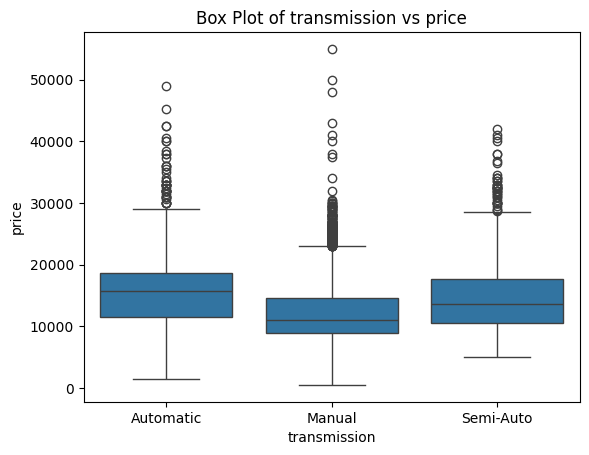

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a box plot using Seaborn
sns.boxplot(x='transmission', y='price', data=df)

# Add labels and title
plt.xlabel('transmission')
plt.ylabel('price')
plt.title('Box Plot of transmission vs price')

# Display the plot
plt.show()

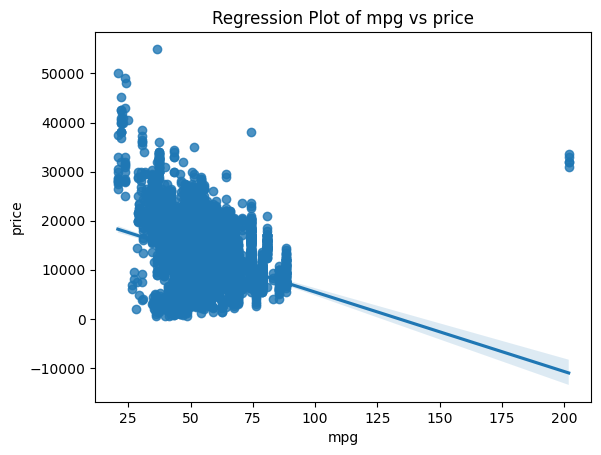

In [17]:
# Create a regression plot using Seaborn
sns.regplot(x='mpg', y='price', data=df)

# Add labels and title
plt.xlabel('mpg')
plt.ylabel('price')
plt.title('Regression Plot of mpg vs price')

# Display the plot
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Separate the source and target variables
X = df[['mpg']]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.1198980224962416
Mean Squared Error (MSE): 19741690.809446193


In [19]:
# Separate the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict the target variable
y_pred = model.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.7265379654547005
Mean Squared Error (MSE): 6134065.224381731


In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Separate the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Create a pipeline with standard scalar, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Fit the pipeline on the target variable
pipeline.fit(X, y)

# Predict the target variable
y_pred = pipeline.predict(X)

# Calculate R^2 value
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.7666619695239302
Mean Squared Error (MSE): 5234038.06546274


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error


# Separate the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict the target variable using the testing data
y_pred = ridge_model.predict(X_test)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

R^2 value: 0.6917134446113138
Mean Squared Error (MSE): 6912725.801054926


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Separate the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict the target variable using the testing data
y_pred = ridge_model.predict(X_test_poly)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.17676e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


R^2 value: 0.6732748888228912
Mean Squared Error (MSE): 7326174.516559619


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Separate the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create Ridge regression model
ridge = Ridge()
parameters = {'alpha': [0.01, 0.1, 1, 10, 100]}  # Set of values for the regularization parameter alpha

# Perform Grid Search with Cross Validation
ridge_grid = GridSearchCV(ridge, parameters, cv=4)
ridge_grid.fit(X_train_poly, y_train)

# Predict the target variable using the testing data
y_pred = ridge_grid.predict(X_test_poly)

# Calculate R^2 value
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

print("R^2 value:", r2)
print("Mean Squared Error (MSE):", mse)

/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.88233e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=3.01744e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.78199e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=2.93807e-24): res

R^2 value: 0.38273414165607345
Mean Squared Error (MSE): 13840985.117578594


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
